11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Ukuran data latih: (60000, 28, 28)
Ukuran data uji: (10000, 28, 28)


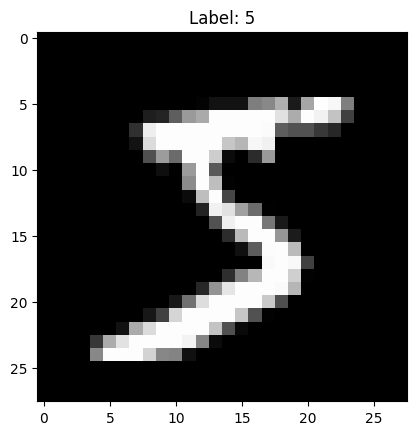

In [ ]:
# Import library
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load dataset MNIST dari TensorFlow
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalisasi data (biar cepat dilatih)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Cek bentuk data
print("Ukuran data latih:", x_train.shape)
print("Ukuran data uji:", x_test.shape)

# Tampilkan contoh gambar
plt.imshow(x_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.show()


In [ ]:
# Buat model neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # ubah gambar 2D jadi 1D
    tf.keras.layers.Dense(128, activation='relu'), # hidden layer
    tf.keras.layers.Dense(10, activation='softmax') # output layer (10 angka)
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8804 - loss: 0.4267 - val_accuracy: 0.9607 - val_loss: 0.1367
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9638 - loss: 0.1229 - val_accuracy: 0.9699 - val_loss: 0.1008
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9757 - loss: 0.0810 - val_accuracy: 0.9739 - val_loss: 0.0865
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9832 - loss: 0.0553 - val_accuracy: 0.9748 - val_loss: 0.0814
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9875 - loss: 0.0412 - val_accuracy: 0.9743 - val_loss: 0.0839


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9702 - loss: 0.0978
Akurasi data uji: 0.9743000268936157
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


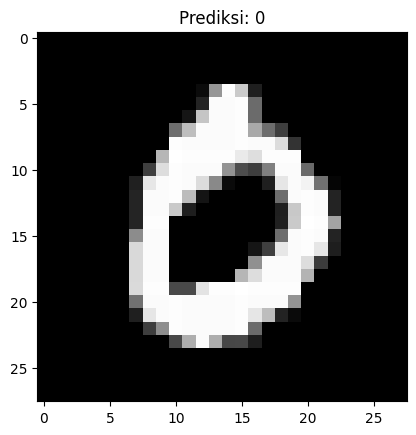

In [ ]:
# Evaluasi performa model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Akurasi data uji:", test_acc)

# Prediksi contoh
predictions = model.predict(x_test)

# Tampilkan hasil prediksi dari gambar ke-0
plt.imshow(x_test[3], cmap='gray')
plt.title(f"Prediksi: {np.argmax(predictions[3])}")
plt.show()
